# Лабораторная №4
### Набор данных -- "Пригодность воды для питья"

In [1]:
from itertools import product
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix

### Чтение данных из файла

In [2]:
data = pd.read_csv('data.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Подсчёт пропущенных значений в каждом столбце

In [3]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Удаление строк с пропущенными значениями

In [4]:
data = data.dropna()
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


### Подсчёт уникальных значений в столбце 'Potability'

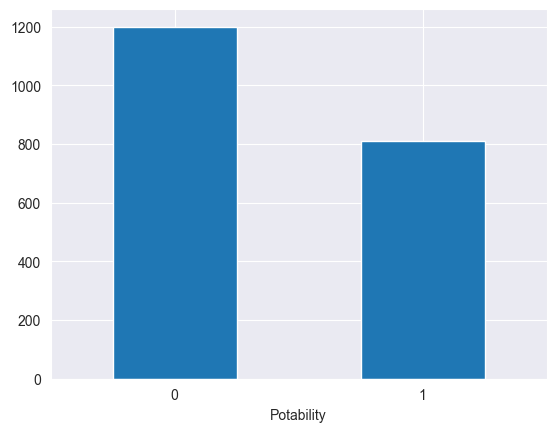

In [5]:
# Создаем график
data['Potability'].value_counts().plot(kind='bar')
# Удаление разворота подписей
plt.xticks(rotation=0)
# вывод графика
plt.show()

### Осуществление балансировки данных по целевой переменной

Min ratio: 811


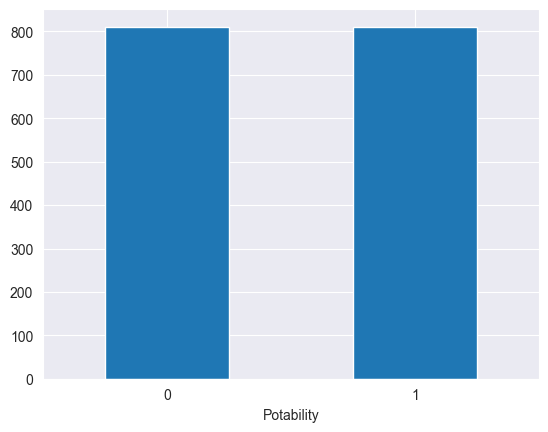

In [6]:
min_ratio = data['Potability'].value_counts().min()
print(f"Min ratio: {min_ratio}")

# выборка для Potability = 0
# число значений в выборке равно min_ratio
# replace=True -- возможность замены
data_0 = data[data['Potability'] == 0].sample(min_ratio, replace=True)

# выборка для Potability = 1
data_1 = data[data['Potability'] == 1]

# создание нового объединённого датафрейма
data_balanced = pd.concat([data_0, data_1])

# построение графика
data_balanced['Potability'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

### Тепловая карта

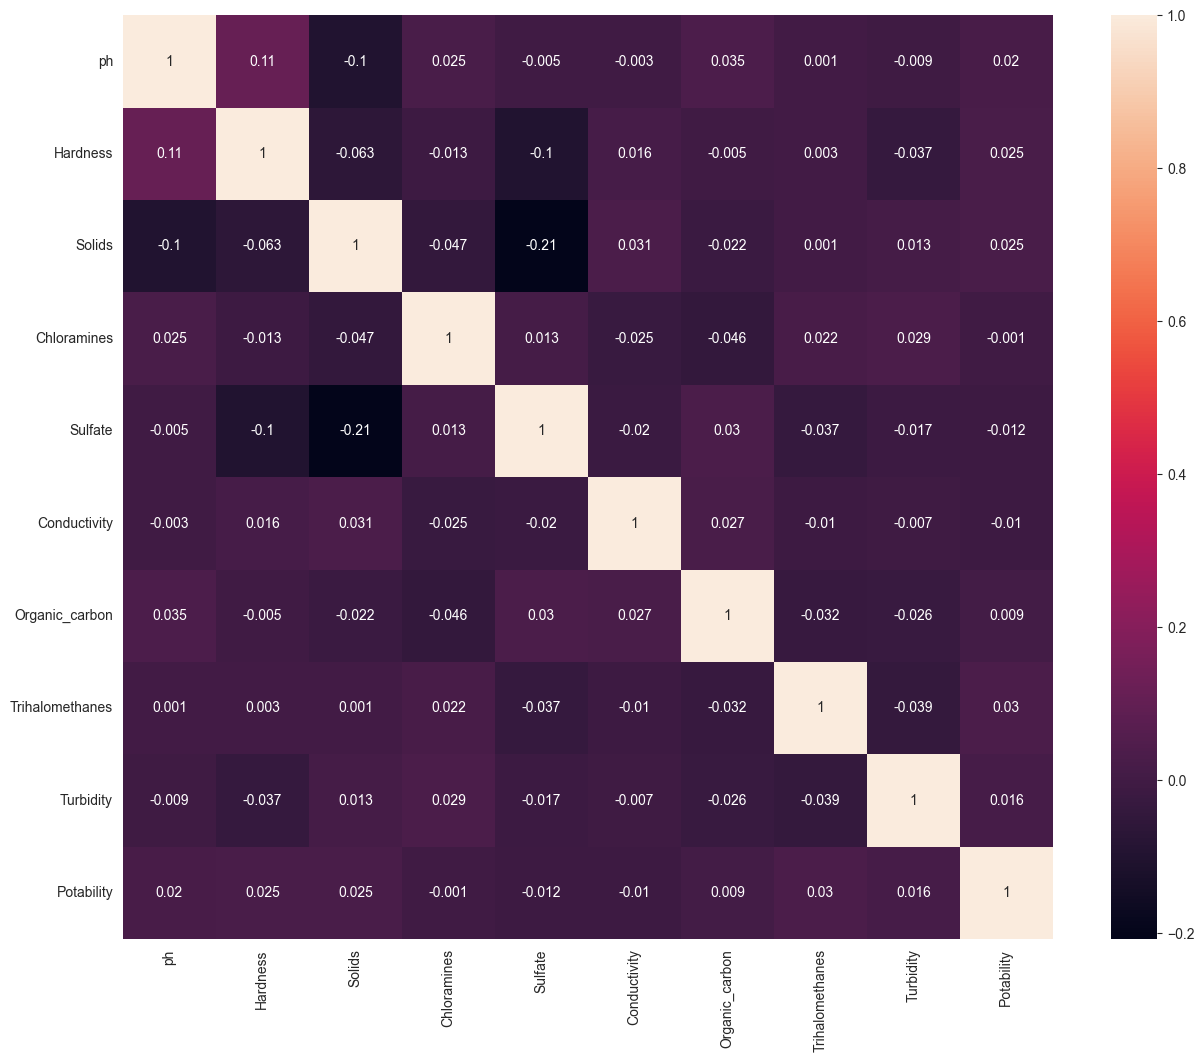

In [7]:
plt.figure(figsize=(15,12))
# data_balanced.corr() -- вычисление матрицы корреляции
# round(decimals=2) -- округление значений корреляции до 2-ух знаков после запятой
# sns.heatmap() -- построение тепловой карты (положительная - светлые цвета; отрицательная - тёмные цвета)
# annot=True -- добавление числовой аннотации к каждой ячейке
sns.heatmap(data_balanced.corr().round(decimals=3), annot=True)
plt.show()

### Точечная диаграмма

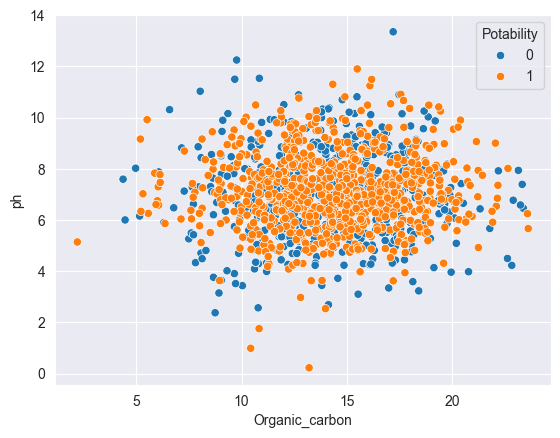

In [8]:
# ось Ох -- столбец 'Organic_carbon'
# ось Оу -- столбец 'ph'
# hue='Potability' -- разделение данных по группам в соответствии со столбцом 'Potability'
sns.scatterplot(x='Organic_carbon', y='ph', data=data_balanced, hue='Potability')
plt.show()

### Нормализация данных

In [9]:
# min-max нормализация
# изменяем каждый признак так, чтобы он попадал в промежуток от 0 до 1
scaler = MinMaxScaler()

data_scaled_values = scaler.fit_transform(data_balanced)
data_scaled = pd.DataFrame(columns = list(data.columns), data = data_scaled_values)

# вывод нормализованного датафрейма
data_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.534448,0.523669,0.417716,0.541952,0.602174,0.684403,0.527295,0.468479,0.417523,0.0
1,0.610512,0.511475,0.198163,0.333851,0.512255,0.361493,0.515940,0.629170,0.264575,0.0
2,0.487493,0.404203,0.259159,0.484748,0.594952,0.370110,0.628666,0.433046,0.571628,0.0
3,0.670996,0.339450,0.437558,0.532438,0.816777,0.255792,0.532583,0.467195,0.431367,0.0
4,0.539578,0.825163,0.254231,0.572159,0.725973,0.387853,0.680313,0.522948,0.445239,0.0
...,...,...,...,...,...,...,...,...,...,...
1617,0.667744,0.580511,0.277748,0.418063,0.522486,0.342184,0.359700,0.402799,0.627156,1.0
1618,0.493435,0.548826,0.301347,0.538273,0.498565,0.231359,0.654883,0.175889,0.395061,1.0
1619,0.858343,0.087434,0.656389,0.670774,0.369089,0.431872,0.652801,0.285745,0.578674,1.0
1620,0.445202,0.464092,0.459656,0.541633,0.615572,0.388360,0.461011,0.449156,0.440004,1.0


### Разделение на признаки и целевую переменную

In [10]:
# целевая переменная -- столбец 'Potability'
y = data_scaled.pop('Potability')
# признаки -- все столбцы, кроме 'Potability'
x = data_scaled.values

### Разделение на обучающий и тестовый наборы

In [11]:
# 20% данных выделяется на тестирование
# random_state=42 -- нач. значение для генератора случайных чисел (чтобы можно было повторить р-ты)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Стандартизация данных

In [12]:
scaler = StandardScaler()

# вычисление среднего и стандартного отклонения для обучающего набора
scaler.fit(X_train)

# применение стандартизации к обучающему и тестовому наборам
X_train_transform = scaler.transform(X_train) # центрирование и масштабирование X_train
X_test_transform = scaler.transform(X_test) # обеспечение согласованности между X_train и X_test

## Создание классификатора

In [13]:
# в данной ф-ции обучается MLP классификатор на обучающих данных 
# и оценивается его точность на тестовых данных
def calculate_accuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(X_train_transform, Y_train)
    return mlpcClf.score(X_test_transform, Y_test)

### Выбор параметров с наибольшей точностью классификации

In [14]:
# ф-ция активации 
# 'identity' -- ф-ция активации f(x) = x
# 'logistic' -- логистическая ф-цию активация f(x) = 1 / (1 + exp(-x))
# 'tanh' -- гиперболический тангенс в качестве ф-ции активации f(x) = tanh(x)
# 'relu' -- ф-ция активации ReLU (Rectified Linear Unit) f(x) = max(0, x)
fArr = ['identity', 'logistic', 'tanh', 'relu']

# оптимизатор 
# 'lbfgs' -- метод L-BFGS (квазиньютоновский метод); для маленьких датасетов
# 'sgd' -- стохастический градиентный спуск
# 'adam' --  оптимизатор Adam (преимущества адаптивного градиентного спуска и адаптивного стохастического градиентного спуска); для больших датасетов
solverArr = ['lbfgs', 'sgd', 'adam']

# кол-во нейронов на одном уровне (скрытый слой)
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]

# число итераций
iterArr = [200, 500, 700, 1000]

parameter_combinations = list(product(fArr, solverArr, hiddenLayerSizeArr, iterArr))

In [15]:
accuracies = []

for params in parameter_combinations: 
    activation, solver, layerSize, max_iter = params 
    mlpcClf = MLPClassifier( 
        activation=activation, 
        solver=solver, 
        hidden_layer_sizes=layerSize, 
        early_stopping=True, 
        random_state=42, 
        max_iter=max_iter) 
    accuracy = calculate_accuracy(mlpcClf) 
    accuracies.append((params, accuracy))

best_accuracy = max(accuracies, key=lambda x: x[1])
sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)

# вывод первых 10-ти параметров с наибольшей точностью
for model in sorted_accuracies[:10]:
    print(f"{model[0]} -- {model[1]}")

best_model_params = best_accuracy[0]
best_activation, best_solver, best_layerSize, best_max_iter = best_model_params

print(f"\nЛучший метод: {best_model_params}")

('relu', 'lbfgs', (350,), 200) -- 0.7292307692307692
('relu', 'lbfgs', (350,), 500) -- 0.7292307692307692
('relu', 'lbfgs', (350,), 700) -- 0.7292307692307692
('relu', 'lbfgs', (350,), 1000) -- 0.7292307692307692
('relu', 'lbfgs', (750,), 200) -- 0.7292307692307692
('relu', 'lbfgs', (750,), 500) -- 0.7292307692307692
('relu', 'lbfgs', (750,), 700) -- 0.7292307692307692
('relu', 'lbfgs', (750,), 1000) -- 0.7292307692307692
('relu', 'lbfgs', (250,), 200) -- 0.7261538461538461
('relu', 'lbfgs', (250,), 500) -- 0.7261538461538461

Лучший метод: ('relu', 'lbfgs', (350,), 200)


## ИТОГОВЫЙ РЕЗУЛЬТАТ

In [16]:
# создание модели с наилучшими параметрами
mlpcClf = MLPClassifier(
        activation=best_activation,
        solver=best_solver,
        hidden_layer_sizes=best_layerSize, 
        early_stopping=True,
        random_state=42,
        max_iter=best_max_iter)

mlpcClf.fit(X_train_transform, Y_train)
print(f"MLPClassifier with params: \n* activation='{best_activation}', \n* solver='{best_solver}', \n* hidden_layer_sizes={best_layerSize}, \n* max_iter={best_max_iter}")
print(f"\nAccuracy: {calculate_accuracy(mlpcClf)}")

MLPClassifier with params: 
* activation='relu', 
* solver='lbfgs', 
* hidden_layer_sizes=(350,), 
* max_iter=200

Accuracy: 0.7292307692307692


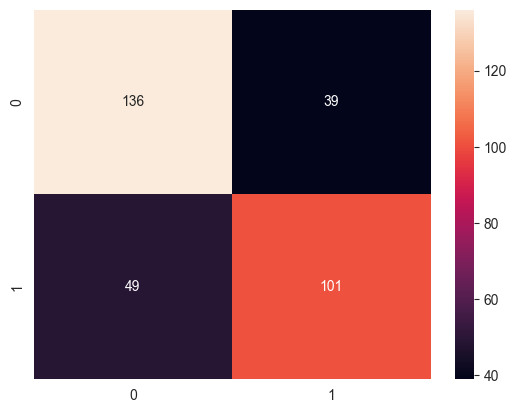

In [17]:
Y_predict = mlpcClf.predict(X_test_transform)
# создание матрицы ошибок
# сравнение предсказанных значений и фактических значений на тестовых данных
classes_names = ['0','1']
cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict), columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()